In [1]:
import matplotlib.pyplot as plt
import itertools
import cmocean
import cmocean.cm as cmo

def draw(political_map, army_map):
    lightcmap = cmocean.tools.lighten(cmo.amp, 0.05)
    cax = plt.imshow(political_map, cmap = lightcmap, aspect='auto')
    xtick_marks = np.arange(len(political_map))
    ytick_marks = np.arange(len(political_map))
    
    for i, j in itertools.product(range(political_map.shape[0]), range(political_map.shape[1])):
        if political_map[i][j] == 0:
            political = "red"
        if political_map[i][j] == 1:
            political = "green"
        if political_map[i][j] ==2:
            political = "blue"
        if political_map[i][j] == 3:
            political = "cyan"
        plt.text(j, i, army_map[i, j],horizontalalignment="center",color=political,size=30)
    plt.xticks(xtick_marks)
    plt.yticks(ytick_marks)
    plt.tight_layout()
    plt.show()

In [2]:
import random
import itertools
def battle(political_map, army_map, attacker, defender, current):
    ay = int(attacker[0])
    ax = int(attacker[1])
    dy = int(defender[0])
    dx = int(defender[1])
    if (ax != dx) & (ay !=dy):
        print("Invalid move. You can only attack adjacent regions")
        return (political_map, army_map)
    attack_army = army_map[ay][ax]
    defend_army = army_map[dy][dx]
    attack_power = 0
    defend_power = 0
    for i in range(attack_army):
        attack_power = attack_power + random.randint(1, 6)
    for i in range(defend_army):
        defend_power = defend_power + random.randint(1, 6)
    text = 'Player '+ str(current)
    print(colored(text,faction[current])," attacked ", defend_army, "defending armies with ", attack_army, "armies")
    print(colored(text,faction[current]),"'s attack power is ", attack_power, "and the enemy defend power is", defend_power)
    if attack_power > defend_power:
        print(colored(text,faction[current])," overpowered the defender and successfully captured region ", dy, dx)
        political_map[dy][dx] = current
        army_map[dy][dx] = attack_army - 1
        army_map[ay][ax] = 1
    else:
        print(colored(text,faction[current]), " failed to capture location ", dy, dx, "and lost half the troops")
        army_map[ay][ax] = int(attack_army/2)
    return (political_map, army_map)

In [3]:
def verify_move(attacker, defender, player):
    ay = int(attacker[0])
    ax = int(attacker[1])
    dy = int(defender[0])
    dx = int(defender[1])
    if (ax > map_size) or (ay > map_size) or (dx > map_size) or (dy > map_size):
        print("chosen location invalid")
        return 0
    if political_map[ay][ax] != player:
        print("Start location does not belong to you")
        return 0
    if political_map[dy][dx] == player:
        print("You cannot move towards own region")
        return 0
    if (abs(dy-ay)>1) or (abs(ax-dx)>1):
        print("Please only attack a hostile adjacent region")
        return 0
    else:
        return 1

In [4]:
def enemy_moves(political_map, army_map):
    for current in range(player_num):
        if current == player:
            current = current + 1
            continue
        text = "Player " + str(current)
        print(colored(text, faction[current]), "'s turn")
        #deploy
        recruits = int(np.sqrt(recruit(political_map, army_map, current)))
        if recruits > map_size**2/4:
            recruist = int(map_size**2/3)
        if recruits == 0:
            text = "Player " + str(current)
            print(colored(text, faction[current]), "has been wiped out")
            continue
            
        #battle
        for i in range(map_size):
            for j in range(map_size):
                if political_map[i][j] == current:
                    targeti = i
                    targetj = j
                    if (i-1)>=0:
                        if (political_map[i-1][j]!=current):
                            army_map[i][j] = army_map[i][j] + recruits
                            recruits = 0
                            if (army_map[i-1][j]<army_map[targeti][targetj]):
                                targeti = i-1
                                targetj = j
                    if ((i+1)<map_size):
                        if (political_map[i+1][j]!=current):
                            army_map[i][j] = army_map[i][j] + recruits
                            recruits = 0
                            if (army_map[i+1][j]<army_map[targeti][targetj]):
                                targeti = i+1
                                targetj = j
                    if (j-1)>=0:
                        if (political_map[i][j-1]!=current):
                            army_map[i][j] = army_map[i][j] + recruits
                            recruits = 0
                            if (army_map[i][j-1]<army_map[targeti][targetj]):
                                targeti = i
                                targetj = j-1
                    if ((j+1)<map_size):
                        if (political_map[i][j+1]!=current):
                            army_map[i][j] = army_map[i][j] + recruits
                            recruits = 0
                            if (army_map[i][j+1]<army_map[targeti][targetj]):
                                targeti = i
                                targetj = j+1
                    if army_map[i][j] <= army_map[targeti][targetj]:
                        continue #weaker than even the weakest hostile neighbor, no desirable target found

                    attacker = [i,j]
                    defender = [targeti,targetj]
                    delay = input("Enemy turn. Press enter to continue\n")
                    battle(political_map, army_map, attacker, defender, current)
                    draw(political_map, army_map)
                    
    current = current + 1
    return factions

In [5]:
def recruit(political_map, army_map, current):
    current_count = 0
    for i in range(map_size):
        for j in range(map_size):
            if political_map[i][j]==current:
                current_count = current_count + 1
    return current_count

========Warring States===========
Press 'enter' to begin.
The world has fell apart and it is warring states era. You have to lead your country and army and conquer all other countries.
How big a map size would you like? Select from 3 to 5
5
How many players to start with? Select from 2 to 4
2


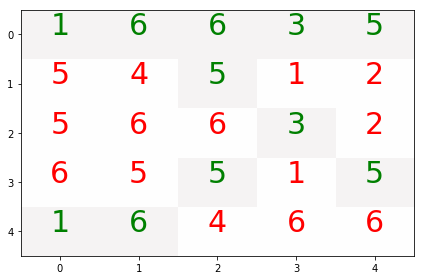

This is a turn based game. The text colors represent region ownership. The text shows garrison number. When you ask one of the army of 4 to attack another army of 3, 4 dices are rolled against 3, higher number wins.
Playable factions include:
player0
player1
Type a faction number.
1
Your are  Player1
The surviving countries include:
player0
player1
Player 1, it is your turn.
Deploy phase. You have  3  recruits based on number of regions you have, assign one of your own regions to deploy them

Please type two digits representing the row number and column number of a region with no commas or spaces
0111
Please enter a valid order, with 2 digits representing a region's row and colum

Deploy phase. You have  3  recruits based on number of regions you have, assign one of your own regions to deploy them

Please type two digits representing the row number and column number of a region with no commas or spaces
01


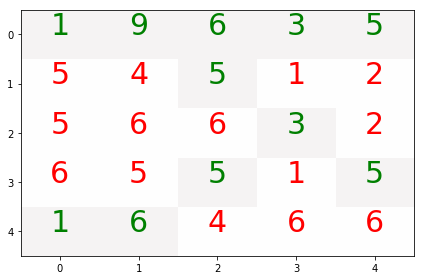

Battle phase. Your orders, sir? Select one of your regions and an adjacent hostile region

type four digits representing 2 regions(row and column) with no commas or spaces, or type pass to end turn if you wish to make no more moves, or type quit to end game
0111
You asked region  ('0', '1') to attack region ('1', '1')
Player 1  attacked  4 defending armies with  9 armies
Player 1 's attack power is  40 and the enemy defend power is 10
Player 1  overpowered the defender and successfully captured region  1 1


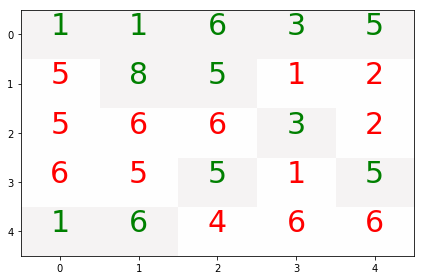

Battle phase. Your orders, sir? Select one of your regions and an adjacent hostile region

type four digits representing 2 regions(row and column) with no commas or spaces, or type pass to end turn if you wish to make no more moves, or type quit to end game
1121
You asked region  ('1', '1') to attack region ('2', '1')
Player 1  attacked  6 defending armies with  8 armies
Player 1 's attack power is  33 and the enemy defend power is 17
Player 1  overpowered the defender and successfully captured region  2 1


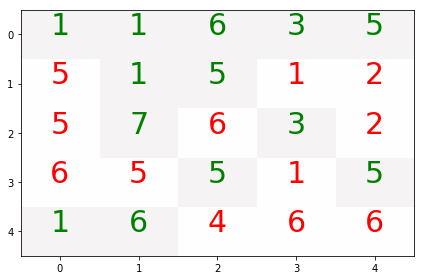

Battle phase. Your orders, sir? Select one of your regions and an adjacent hostile region

type four digits representing 2 regions(row and column) with no commas or spaces, or type pass to end turn if you wish to make no more moves, or type quit to end game
2122
You asked region  ('2', '1') to attack region ('2', '2')
Player 1  attacked  6 defending armies with  7 armies
Player 1 's attack power is  25 and the enemy defend power is 15
Player 1  overpowered the defender and successfully captured region  2 2


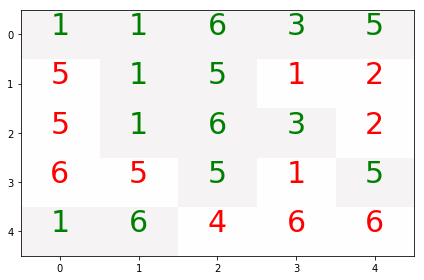

Battle phase. Your orders, sir? Select one of your regions and an adjacent hostile region

type four digits representing 2 regions(row and column) with no commas or spaces, or type pass to end turn if you wish to make no more moves, or type quit to end game
4131
You asked region  ('4', '1') to attack region ('3', '1')
Player 1  attacked  5 defending armies with  6 armies
Player 1 's attack power is  27 and the enemy defend power is 22
Player 1  overpowered the defender and successfully captured region  3 1


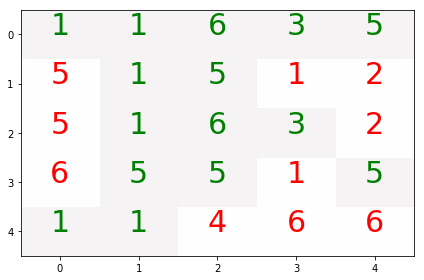

Battle phase. Your orders, sir? Select one of your regions and an adjacent hostile region

type four digits representing 2 regions(row and column) with no commas or spaces, or type pass to end turn if you wish to make no more moves, or type quit to end game
3242
You asked region  ('3', '2') to attack region ('4', '2')
Player 1  attacked  4 defending armies with  5 armies
Player 1 's attack power is  21 and the enemy defend power is 14
Player 1  overpowered the defender and successfully captured region  4 2


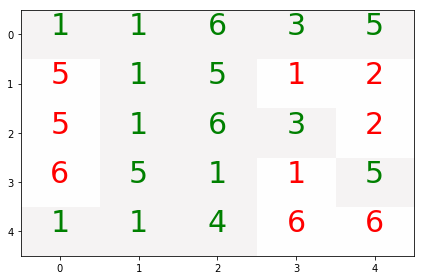

Battle phase. Your orders, sir? Select one of your regions and an adjacent hostile region

type four digits representing 2 regions(row and column) with no commas or spaces, or type pass to end turn if you wish to make no more moves, or type quit to end game
3424
You asked region  ('3', '4') to attack region ('2', '4')
Player 1  attacked  2 defending armies with  5 armies
Player 1 's attack power is  23 and the enemy defend power is 11
Player 1  overpowered the defender and successfully captured region  2 4


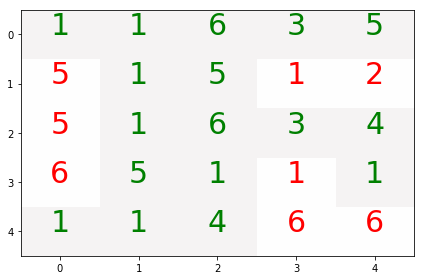

Battle phase. Your orders, sir? Select one of your regions and an adjacent hostile region

type four digits representing 2 regions(row and column) with no commas or spaces, or type pass to end turn if you wish to make no more moves, or type quit to end game
0414
You asked region  ('0', '4') to attack region ('1', '4')
Player 1  attacked  2 defending armies with  5 armies
Player 1 's attack power is  21 and the enemy defend power is 9
Player 1  overpowered the defender and successfully captured region  1 4


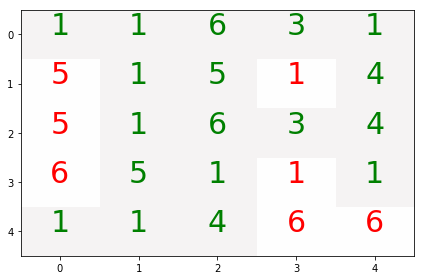

Battle phase. Your orders, sir? Select one of your regions and an adjacent hostile region

type four digits representing 2 regions(row and column) with no commas or spaces, or type pass to end turn if you wish to make no more moves, or type quit to end game
1413
You asked region  ('1', '4') to attack region ('1', '3')
Player 1  attacked  1 defending armies with  4 armies
Player 1 's attack power is  18 and the enemy defend power is 4
Player 1  overpowered the defender and successfully captured region  1 3


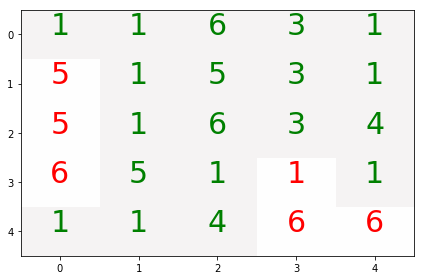

Battle phase. Your orders, sir? Select one of your regions and an adjacent hostile region

type four digits representing 2 regions(row and column) with no commas or spaces, or type pass to end turn if you wish to make no more moves, or type quit to end game
2333
You asked region  ('2', '3') to attack region ('3', '3')
Player 1  attacked  1 defending armies with  3 armies
Player 1 's attack power is  14 and the enemy defend power is 6
Player 1  overpowered the defender and successfully captured region  3 3


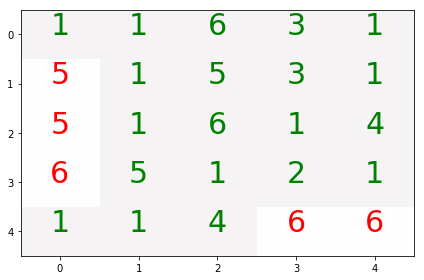

Battle phase. Your orders, sir? Select one of your regions and an adjacent hostile region

type four digits representing 2 regions(row and column) with no commas or spaces, or type pass to end turn if you wish to make no more moves, or type quit to end game
pass
You ended this turn.
Player 0 's turn
Enemy turn. Press enter to continue

Player 0  attacked  1 defending armies with  7 armies
Player 0 's attack power is  24 and the enemy defend power is 3
Player 0  overpowered the defender and successfully captured region  0 0


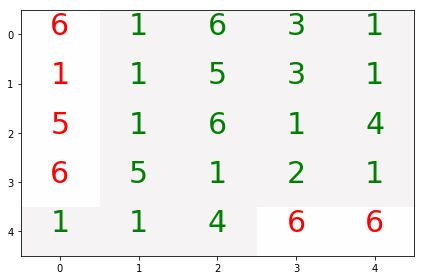

Enemy turn. Press enter to continue

Player 0  attacked  1 defending armies with  5 armies
Player 0 's attack power is  16 and the enemy defend power is 1
Player 0  overpowered the defender and successfully captured region  2 1


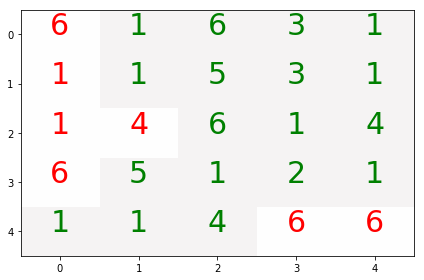

Enemy turn. Press enter to continue

Player 0  attacked  1 defending armies with  4 armies
Player 0 's attack power is  16 and the enemy defend power is 6
Player 0  overpowered the defender and successfully captured region  1 1


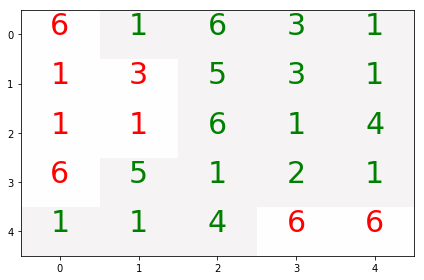

Enemy turn. Press enter to continue

Player 0  attacked  1 defending armies with  6 armies
Player 0 's attack power is  21 and the enemy defend power is 3
Player 0  overpowered the defender and successfully captured region  4 0


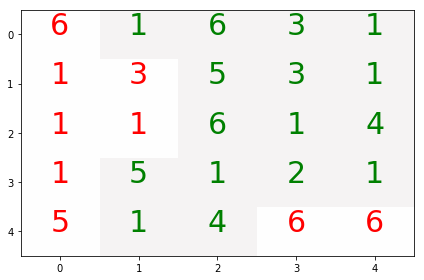

Enemy turn. Press enter to continue

Player 0  attacked  1 defending armies with  5 armies
Player 0 's attack power is  16 and the enemy defend power is 6
Player 0  overpowered the defender and successfully captured region  4 1


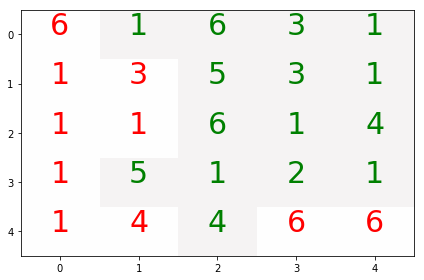

Enemy turn. Press enter to continue

Player 0  attacked  2 defending armies with  6 armies
Player 0 's attack power is  13 and the enemy defend power is 9
Player 0  overpowered the defender and successfully captured region  3 3


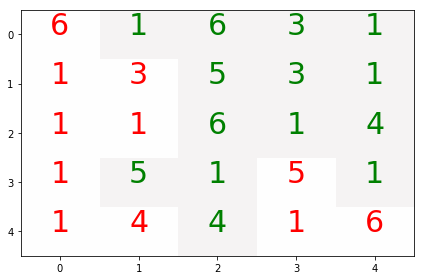

Enemy turn. Press enter to continue

Player 0  attacked  1 defending armies with  6 armies
Player 0 's attack power is  13 and the enemy defend power is 5
Player 0  overpowered the defender and successfully captured region  3 4


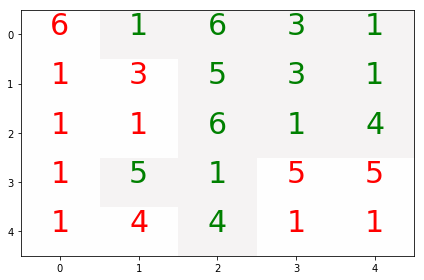

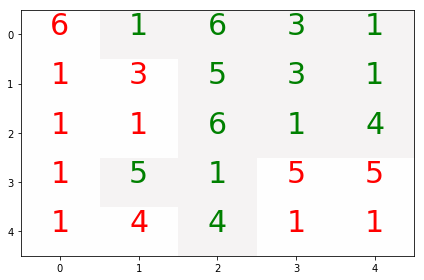

The surviving countries include:
player0
player1
Player 1, it is your turn.
Deploy phase. You have  3  recruits based on number of regions you have, assign one of your own regions to deploy them

Please type two digits representing the row number and column number of a region with no commas or spaces
22


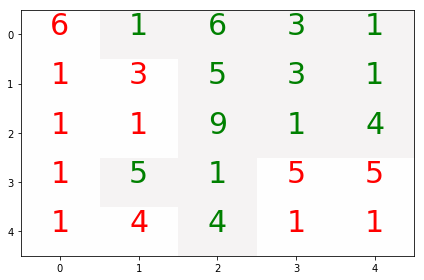

Battle phase. Your orders, sir? Select one of your regions and an adjacent hostile region

type four digits representing 2 regions(row and column) with no commas or spaces, or type pass to end turn if you wish to make no more moves, or type quit to end game
2221
You asked region  ('2', '2') to attack region ('2', '1')
Player 1  attacked  1 defending armies with  9 armies
Player 1 's attack power is  39 and the enemy defend power is 6
Player 1  overpowered the defender and successfully captured region  2 1


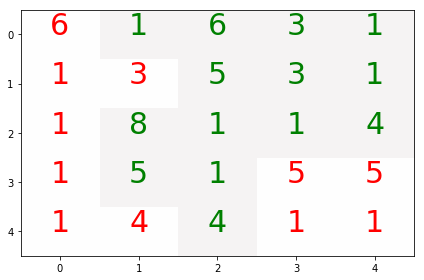

Battle phase. Your orders, sir? Select one of your regions and an adjacent hostile region

type four digits representing 2 regions(row and column) with no commas or spaces, or type pass to end turn if you wish to make no more moves, or type quit to end game
1211
You asked region  ('1', '2') to attack region ('1', '1')
Player 1  attacked  3 defending armies with  5 armies
Player 1 's attack power is  23 and the enemy defend power is 10
Player 1  overpowered the defender and successfully captured region  1 1


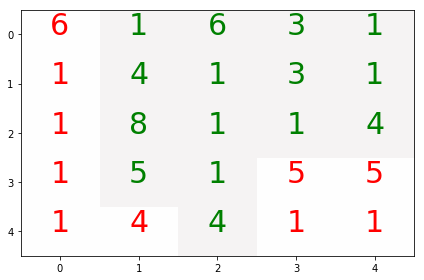

Battle phase. Your orders, sir? Select one of your regions and an adjacent hostile region

type four digits representing 2 regions(row and column) with no commas or spaces, or type pass to end turn if you wish to make no more moves, or type quit to end game
2120
You asked region  ('2', '1') to attack region ('2', '0')
Player 1  attacked  1 defending armies with  8 armies
Player 1 's attack power is  32 and the enemy defend power is 2
Player 1  overpowered the defender and successfully captured region  2 0


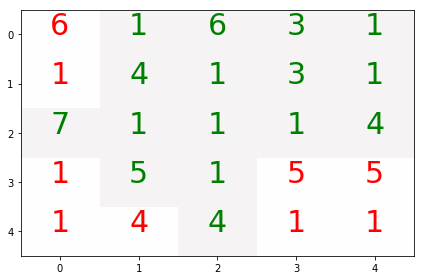

Battle phase. Your orders, sir? Select one of your regions and an adjacent hostile region

type four digits representing 2 regions(row and column) with no commas or spaces, or type pass to end turn if you wish to make no more moves, or type quit to end game
2010
You asked region  ('2', '0') to attack region ('1', '0')
Player 1  attacked  1 defending armies with  7 armies
Player 1 's attack power is  26 and the enemy defend power is 1
Player 1  overpowered the defender and successfully captured region  1 0


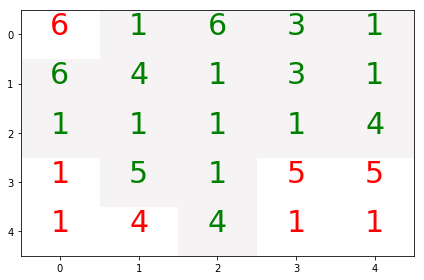

Battle phase. Your orders, sir? Select one of your regions and an adjacent hostile region

type four digits representing 2 regions(row and column) with no commas or spaces, or type pass to end turn if you wish to make no more moves, or type quit to end game
1000
You asked region  ('1', '0') to attack region ('0', '0')
Player 1  attacked  6 defending armies with  6 armies
Player 1 's attack power is  23 and the enemy defend power is 20
Player 1  overpowered the defender and successfully captured region  0 0


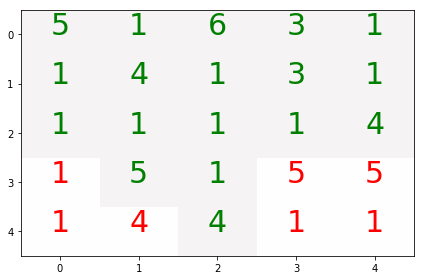

Battle phase. Your orders, sir? Select one of your regions and an adjacent hostile region

type four digits representing 2 regions(row and column) with no commas or spaces, or type pass to end turn if you wish to make no more moves, or type quit to end game
3141
You asked region  ('3', '1') to attack region ('4', '1')
Player 1  attacked  4 defending armies with  5 armies
Player 1 's attack power is  21 and the enemy defend power is 10
Player 1  overpowered the defender and successfully captured region  4 1


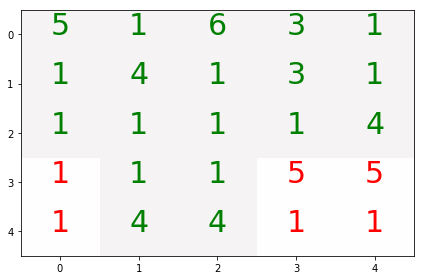

Battle phase. Your orders, sir? Select one of your regions and an adjacent hostile region

type four digits representing 2 regions(row and column) with no commas or spaces, or type pass to end turn if you wish to make no more moves, or type quit to end game
4140
You asked region  ('4', '1') to attack region ('4', '0')
Player 1  attacked  1 defending armies with  4 armies
Player 1 's attack power is  15 and the enemy defend power is 5
Player 1  overpowered the defender and successfully captured region  4 0


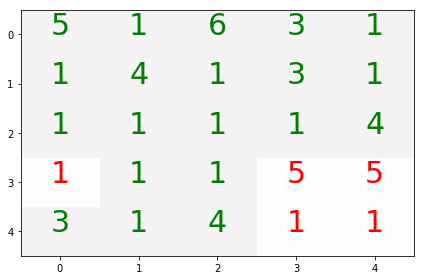

Battle phase. Your orders, sir? Select one of your regions and an adjacent hostile region

type four digits representing 2 regions(row and column) with no commas or spaces, or type pass to end turn if you wish to make no more moves, or type quit to end game
4030
You asked region  ('4', '0') to attack region ('3', '0')
Player 1  attacked  1 defending armies with  3 armies
Player 1 's attack power is  7 and the enemy defend power is 6
Player 1  overpowered the defender and successfully captured region  3 0


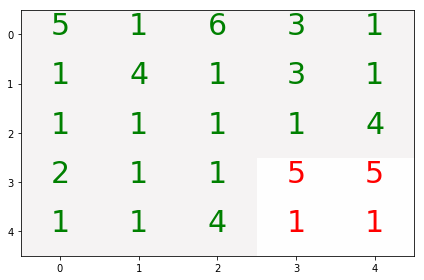

Battle phase. Your orders, sir? Select one of your regions and an adjacent hostile region

type four digits representing 2 regions(row and column) with no commas or spaces, or type pass to end turn if you wish to make no more moves, or type quit to end game
4243
You asked region  ('4', '2') to attack region ('4', '3')
Player 1  attacked  1 defending armies with  4 armies
Player 1 's attack power is  20 and the enemy defend power is 6
Player 1  overpowered the defender and successfully captured region  4 3


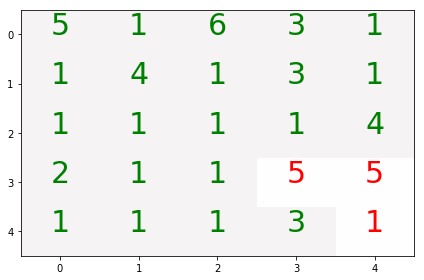

Battle phase. Your orders, sir? Select one of your regions and an adjacent hostile region

type four digits representing 2 regions(row and column) with no commas or spaces, or type pass to end turn if you wish to make no more moves, or type quit to end game
4344
You asked region  ('4', '3') to attack region ('4', '4')
Player 1  attacked  1 defending armies with  3 armies
Player 1 's attack power is  7 and the enemy defend power is 1
Player 1  overpowered the defender and successfully captured region  4 4


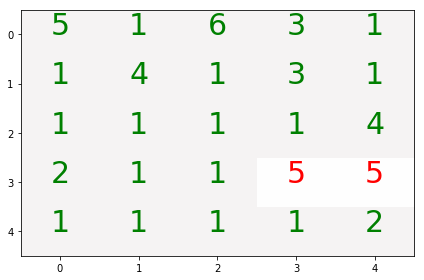

Battle phase. Your orders, sir? Select one of your regions and an adjacent hostile region

type four digits representing 2 regions(row and column) with no commas or spaces, or type pass to end turn if you wish to make no more moves, or type quit to end game
pass
You ended this turn.
Player 0 's turn
Enemy turn. Press enter to continue

Player 0  attacked  1 defending armies with  6 armies
Player 0 's attack power is  27 and the enemy defend power is 5
Player 0  overpowered the defender and successfully captured region  2 3


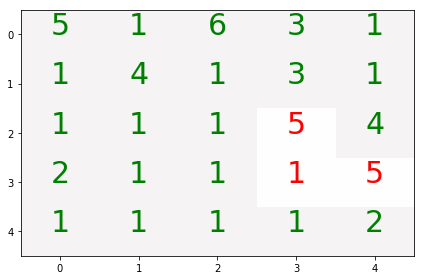

Enemy turn. Press enter to continue

Player 0  attacked  2 defending armies with  5 armies
Player 0 's attack power is  20 and the enemy defend power is 7
Player 0  overpowered the defender and successfully captured region  4 4


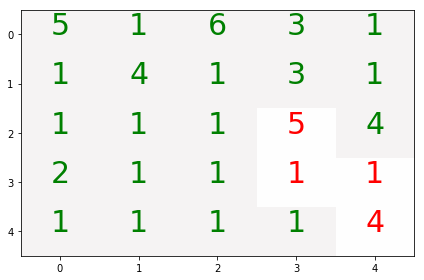

Enemy turn. Press enter to continue

Player 0  attacked  1 defending armies with  4 armies
Player 0 's attack power is  14 and the enemy defend power is 4
Player 0  overpowered the defender and successfully captured region  4 3


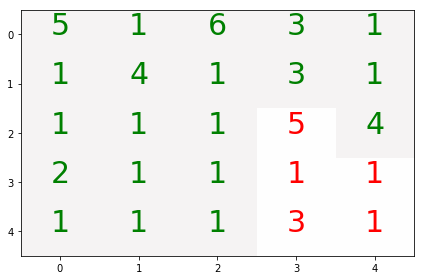

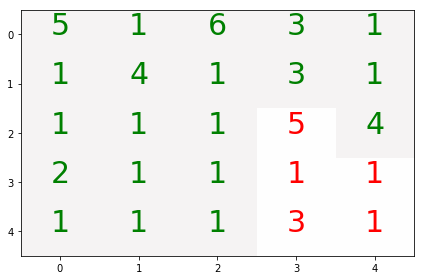

The surviving countries include:
player0
player1
Player 1, it is your turn.
Deploy phase. You have  4  recruits based on number of regions you have, assign one of your own regions to deploy them

Please type two digits representing the row number and column number of a region with no commas or spaces
24


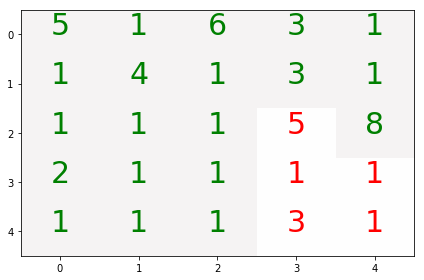

Battle phase. Your orders, sir? Select one of your regions and an adjacent hostile region

type four digits representing 2 regions(row and column) with no commas or spaces, or type pass to end turn if you wish to make no more moves, or type quit to end game
2423
You asked region  ('2', '4') to attack region ('2', '3')
Player 1  attacked  5 defending armies with  8 armies
Player 1 's attack power is  29 and the enemy defend power is 21
Player 1  overpowered the defender and successfully captured region  2 3


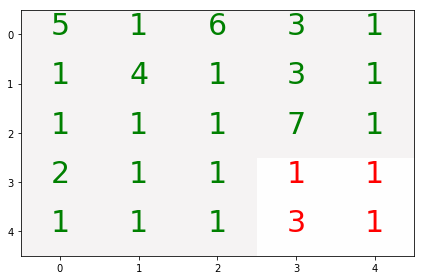

Battle phase. Your orders, sir? Select one of your regions and an adjacent hostile region

type four digits representing 2 regions(row and column) with no commas or spaces, or type pass to end turn if you wish to make no more moves, or type quit to end game
2333
You asked region  ('2', '3') to attack region ('3', '3')
Player 1  attacked  1 defending armies with  7 armies
Player 1 's attack power is  24 and the enemy defend power is 6
Player 1  overpowered the defender and successfully captured region  3 3


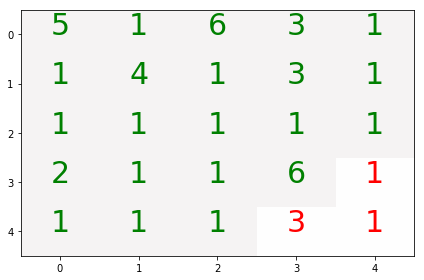

Battle phase. Your orders, sir? Select one of your regions and an adjacent hostile region

type four digits representing 2 regions(row and column) with no commas or spaces, or type pass to end turn if you wish to make no more moves, or type quit to end game
3343
You asked region  ('3', '3') to attack region ('4', '3')
Player 1  attacked  3 defending armies with  6 armies
Player 1 's attack power is  18 and the enemy defend power is 8
Player 1  overpowered the defender and successfully captured region  4 3


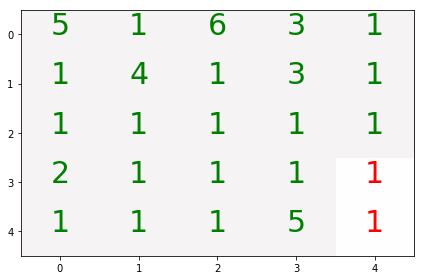

Battle phase. Your orders, sir? Select one of your regions and an adjacent hostile region

type four digits representing 2 regions(row and column) with no commas or spaces, or type pass to end turn if you wish to make no more moves, or type quit to end game
4344
You asked region  ('4', '3') to attack region ('4', '4')
Player 1  attacked  1 defending armies with  5 armies
Player 1 's attack power is  14 and the enemy defend power is 6
Player 1  overpowered the defender and successfully captured region  4 4


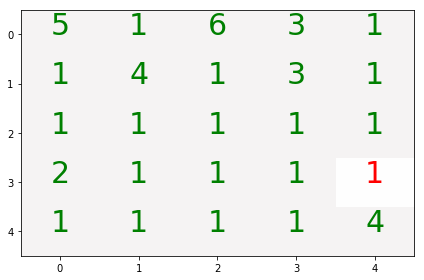

Battle phase. Your orders, sir? Select one of your regions and an adjacent hostile region

type four digits representing 2 regions(row and column) with no commas or spaces, or type pass to end turn if you wish to make no more moves, or type quit to end game
4434
You asked region  ('4', '4') to attack region ('3', '4')
Player 1  attacked  1 defending armies with  4 armies
Player 1 's attack power is  17 and the enemy defend power is 4
Player 1  overpowered the defender and successfully captured region  3 4


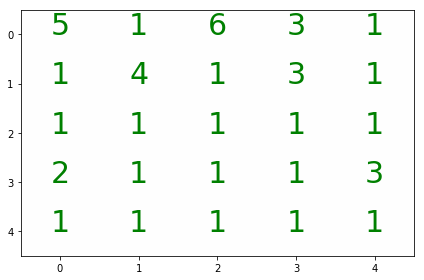

Battle phase. Your orders, sir? Select one of your regions and an adjacent hostile region

type four digits representing 2 regions(row and column) with no commas or spaces, or type pass to end turn if you wish to make no more moves, or type quit to end game
pass
You ended this turn.
Player 0 's turn
Player 0 has been wiped out


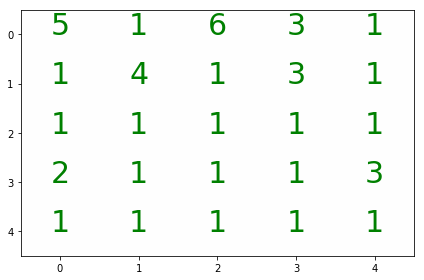

The surviving countries include:
player1
A faction has been destroyed.
Player1 the once divided land is now unified under your banner. All hail to the mighty emperor!


TypeError: a bytes-like object is required, not 'NoneType'

TypeError: a bytes-like object is required, not 'NoneType'

<IPython.core.display.Image object>

In [6]:
#initialize maps
from termcolor import colored
import numpy as np
faction_list = list(range(0,0))
from IPython.core.display import Image, display
title = "========Warring States==========="
print(colored(title,'red'))
#display(Image('https://i.ytimg.com/vi/IT9KfqtkJ50/hqdefault.jpg', width=300, unconfined=True))


faction = ['red','green','blue','cyan']
get = input("Press 'enter' to begin.")
print('The world has fell apart and it is warring states era. You have to lead your country and army and conquer all other countries.')

flag = 0
while(True):
    map_size = int(input('How big a map size would you like? Select from 3 to 5\n'))
    if (map_size>=3) and (map_size<=5):
        break
while(True):
    player_num = int(input('How many players to start with? Select from 2 to 4\n'))
    if (player_num>=2) and (player_num<=4):
        break
factions = player_num
#initialize
done = 0
while done == 0:
    political_map = np.random.randint(0,player_num,(map_size,map_size))
    army_map = np.random.randint(1,7,(map_size,map_size))
    draw(political_map, army_map)
    for i in range(map_size):
        for j in range(map_size):
            if (political_map[i][j] in faction_list)==False:
                faction_list.append(political_map[i][j])
        faction_list.sort()
    if len(faction_list)!=player_num:
        done = 0
    else:
        done = 1
print('This is a turn based game. The text colors represent region ownership. The text shows garrison number. When you ask one of the army of 4 to attack another army of 3, 4 dices are rolled against 3, higher number wins.')
#player 1 action
while(flag==0):
    print("Playable factions include:")
    for i in faction_list:
        text = "player" + str(i) 
        print(colored(text,faction[i]))
    order = input('Type a faction number.\n')
    player = int(order)
    if player in range(player_num):
        flag = 1
        text = "Player" + str(player)
        print("Your are ", colored(text,faction[player]))
        
        break
    else:
        print("There is no such faction")
    
while order != 'quit':
    
    #check survivors
    prev_faction_list = faction_list
    faction_list = list(range(0,0))
    for i in range(map_size):
            for j in range(map_size):
                if (political_map[i][j] in faction_list)==False:
                    faction_list.append(political_map[i][j])
    faction_list.sort()
    print("The surviving countries include:")
    for i in faction_list:
        text = "player" + str(i) 
        print(colored(text,faction[i]))
    if len(faction_list)!=len(prev_faction_list):
        print("A faction has been destroyed.")
        
    recruits = int(np.sqrt(recruit(political_map, army_map, player)))
    if recruits > map_size**2/4:
        recruist = int(map_size**2/3)
    
    #game over yet?
    if len(faction_list) == 1:
        if player == faction_list[0]:
            text = "Player" + str(player)
            print(colored(text,faction[player]), "the once divided land is now unified under your banner. All hail to the mighty emperor!")
            order == 'quit'
            #display image
            from IPython.core.display import Image, display
            display(Image('https://www.gamewallpapers.com/wallpapers_slechte_compressie/wallpaper_shogun_2_total_war_04_1920x1080.jpg', width=400, unconfined=True))
            break
        else:
            print("The war comes to an end. But the final victor is not you.")
    if (player in faction_list)==False:
        text = "Player" + str(player)
        print(colored(text,faction[player]), ", you lost all your territory. You watched helplessly as your legacy burns to ashes, and your wives taken by the enemy.")
        order == 'quit'
        #display image
        from IPython.core.display import Image, display
        display(Image('https://static1.squarespace.com/static/5253d671e4b09b5bd4077ed2/t/5359624de4b095832d6a0351/1381248222616/Defeat_Crushing.jpg', width=400, unconfined=True))
        break
        
    #new turn begins
    process = 'not done'
    text = 'Player '+ str(player) + ', it is your turn.'
    print(colored(text,faction[player]))
    while(process=='not done'):
        print('Deploy phase. You have ',recruits,' recruits based on number of regions you have, assign one of your own regions to deploy them\n')
        order = input('Please type two digits representing the row number and column number of a region with no commas or spaces\n')
        if order == 'quit':
            break
        if len(order)!=2:
            print("Please enter a valid order, with 2 digits representing a region's row and colum\n")
            continue
        y = int(order[0])
        x = int(order[1])
        if (y in range(map_size)) and (x in range(map_size)):
            if (political_map[y][x]==player):
                army_map[y][x] = army_map[y][x] + recruits
                process = 'done'
                draw(political_map, army_map)
                break
            else:
                print('Please select one of your own regions\n')
                continue
        else:
            print('Region does not exist')
    if order == 'quit':
        break
    #player battle phase
    turn = 'not done'
    while (turn == 'not done'):
        print('Battle phase. Your orders, sir? Select one of your regions and an adjacent hostile region\n')
        order = input('type four digits representing 2 regions(row and column) with no commas or spaces, or type pass to end turn if you wish to make no more moves, or type quit to end game\n')
        if len(order)!=4:
            print("Please enter a valid order, with 4 digits representing start and end region's row and colum\n")
            continue
        attacker = order[0],order[1]
        defender = order[2],order[3]
        if order == 'quit':
            break
        if order == 'pass':
            turn = 'done'
            print("You ended this turn.")
            enemy_moves(political_map, army_map)
            draw(political_map, army_map)
            continue
        print('You asked region ',attacker, 'to attack region', defender)
        if verify_move(attacker, defender, player)==1:
            (political_map, army_map) = battle(political_map, army_map, attacker, defender, player)
        draw(political_map, army_map)
        